In [1]:
import pandas as pd

COLUMNS = ['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance', 'Going_outside', 'Drained_after_socializing', 'Friends_circle_size', 'Post_frequency', ]
DATA = '/kaggle/input/extrovert-vs-introvert-behavior-data/personality_dataset.csv'
TARGET = 'Personality'
df = pd.read_csv(filepath_or_buffer=DATA)
df['Stage_fear'] = df['Stage_fear'] == 'Yes'
df['Drained_after_socializing'] = df['Drained_after_socializing'] == 'Yes'
df[TARGET] = df[TARGET] == 'Extrovert'
df = df.fillna(value=0)
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,False,4.0,6.0,False,13.0,5.0,True
1,9.0,True,0.0,0.0,True,0.0,3.0,False
2,9.0,True,1.0,2.0,True,5.0,2.0,False
3,0.0,False,6.0,7.0,False,14.0,8.0,True
4,3.0,False,9.0,4.0,False,8.0,5.0,True


In [2]:
df.nunique().to_frame().T

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,12,2,11,8,2,16,11,2


In [3]:
df['Personality'].value_counts(normalize=True).to_frame().T

Personality,True,False
proportion,0.514138,0.485862


In [4]:
from sklearn.manifold import TSNE

reducer = TSNE(random_state=2025, verbose=True, n_jobs=1, perplexity=20.0, init='pca')
df[['x', 'y']] = reducer.fit_transform(X=df[COLUMNS])

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 2900 samples in 0.004s...
[t-SNE] Computed neighbors for 2900 samples in 0.097s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2900
[t-SNE] Computed conditional probabilities for sample 2000 / 2900
[t-SNE] Computed conditional probabilities for sample 2900 / 2900
[t-SNE] Mean sigma: 0.891079
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.559692
[t-SNE] KL divergence after 1000 iterations: 1.344671


In [5]:
df.dtypes.to_frame().T

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality,x,y
0,float64,bool,float64,float64,bool,float64,float64,bool,float32,float32


<Axes: xlabel='x', ylabel='y'>

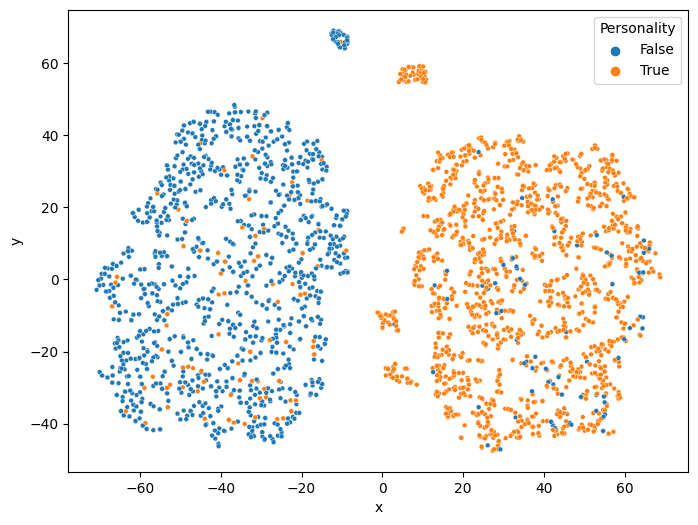

In [6]:
from seaborn import scatterplot
import matplotlib.pyplot as plt

_, ax = plt.subplots(figsize=(8, 6))
scatterplot(data=df, x='x', y='y', hue=TARGET, ax=ax, s=12)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[COLUMNS], df[TARGET], test_size=0.25, random_state=2024, stratify=df[TARGET])
logreg = LogisticRegression(max_iter=100, tol=1e-12).fit(X_train, y_train)
print('model fit in {} iterations'.format(logreg.n_iter_[0]))
print('accuracy: {:5.4f}'.format(accuracy_score(y_true=y_test, y_pred=logreg.predict(X=X_test))))
print('f1: {:5.4f}'.format(f1_score(average='weighted', y_true=y_test, y_pred=logreg.predict(X=X_test))))
print(classification_report(y_true=y_test, y_pred=logreg.predict(X=X_test)))

model fit in 46 iterations
accuracy: 0.9117
f1: 0.9117
              precision    recall  f1-score   support

       False       0.90      0.92      0.91       352
        True       0.92      0.91      0.91       373

    accuracy                           0.91       725
   macro avg       0.91      0.91      0.91       725
weighted avg       0.91      0.91      0.91       725

